In [1]:
# ===================================================================
# Introduction to Data Science - Wine Dataset Analysis
# Authors: [Your Name] & Manoj Kumar Prabhakaran (7026006)
# Assignment: Analysis of Portuguese Wine Dataset
# Date: June 2025
# ===================================================================

# Clear workspace
rm(list = ls())

In [5]:
install.packages(c("reshape2", "moments", "car", "pROC", "psych"))
# Load necessary libraries

Warning message:
"packages 'reshape2', 'moments' are in use and will not be installed"


also installing the dependencies 'rbibutils', 'cowplot', 'Deriv', 'microbenchmark', 'Rdpack', 'numDeriv', 'doBy', 'SparseM', 'MatrixModels', 'minqa', 'nloptr', 'reformulas', 'RcppEigen', 'carData', 'abind', 'Formula', 'pbkrtest', 'quantreg', 'lme4'




package 'rbibutils' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'Deriv' successfully unpacked and MD5 sums checked
package 'microbenchmark' successfully unpacked and MD5 sums checked
package 'Rdpack' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'doBy' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'reformulas' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'pbkrte

In [6]:
# Load required packages
# Note: Install packages if not already installed using install.packages()
library(reshape2)  # For data manipulation (taught in class)
library(moments)   # For skewness calculation
library(car)       # For regression diagnostics
library(pROC)      # For ROC curves and AUC
library(psych)     # For factor analysis and descriptive statistics

Loading required package: carData



Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'psych'


The following object is masked from 'package:car':

    logit




# ===================================================================
# TASK 1: DESCRIPTIVE STATISTICS AND DATA EXPLORATION
# ===================================================================

In [8]:
# Read the wine dataset
wine_data <- read.csv("D:\\DataScience\\wine.csv")


In [9]:
# Basic data structure
cat("Dataset Structure:\n")
str(wine_data)
cat("\nDataset Dimensions:", dim(wine_data), "\n")

Dataset Structure:
'data.frame':	6497 obs. of  14 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ variet

In [11]:
# 1a) Distribution parameters for all metric variables
cat("\n=== TASK 1A: DESCRIPTIVE STATISTICS ===\n")

# Identify metric (numeric) and categorical variables
metric_vars <- c("fixed.acidity", "volatile.acidity", "citric.acid", 
                 "residual.sugar", "chlorides", "free.sulfur.dioxide",
                 "total.sulfur.dioxide", "density", "pH", "sulphates", 
                 "alcohol", "quality")

categorical_vars <- c("variety")



=== TASK 1A: DESCRIPTIVE STATISTICS ===


In [12]:
# Create comprehensive descriptive statistics table
desc_stats <- data.frame(
  Variable = character(),
  Mean = numeric(),
  SD = numeric(),
  Min = numeric(),
  Q1 = numeric(),
  Median = numeric(),
  Q3 = numeric(),
  Max = numeric(),
  Missing = numeric(),
  Skewness = numeric(),
  stringsAsFactors = FALSE
)

In [13]:
# Calculate statistics for each metric variable
for(var in metric_vars) {
  if(var %in% names(wine_data)) {
    x <- wine_data[[var]]
    desc_stats <- rbind(desc_stats, data.frame(
      Variable = var,
      Mean = round(mean(x, na.rm = TRUE), 3),
      SD = round(sd(x, na.rm = TRUE), 3),
      Min = round(min(x, na.rm = TRUE), 3),
      Q1 = round(quantile(x, 0.25, na.rm = TRUE), 3),
      Median = round(median(x, na.rm = TRUE), 3),
      Q3 = round(quantile(x, 0.75, na.rm = TRUE), 3),
      Max = round(max(x, na.rm = TRUE), 3),
      Missing = sum(is.na(x)),
      Skewness = round(skewness(x, na.rm = TRUE), 3)
    ))
  }
}

In [14]:
print(desc_stats)

# Frequency distributions for categorical variables
cat("\n=== FREQUENCY DISTRIBUTIONS FOR CATEGORICAL VARIABLES ===\n")
for(var in categorical_vars) {
  if(var %in% names(wine_data)) {
    cat("\n", var, ":\n")
    freq_table <- table(wine_data[[var]], useNA = "ifany")
    print(freq_table)
    print(prop.table(freq_table))
  }
}

                  Variable    Mean     SD   Min     Q1  Median      Q3     Max
25%          fixed.acidity   7.215  1.296 3.800  6.400   7.000   7.700  15.900
25%1      volatile.acidity   0.340  0.165 0.080  0.230   0.290   0.400   1.580
25%2           citric.acid   0.319  0.145 0.000  0.250   0.310   0.390   1.660
25%3        residual.sugar   5.443  4.758 0.600  1.800   3.000   8.100  65.800
25%4             chlorides   0.056  0.035 0.009  0.038   0.047   0.065   0.611
25%5   free.sulfur.dioxide  30.525 17.749 1.000 17.000  29.000  41.000 289.000
25%6  total.sulfur.dioxide 115.745 56.522 6.000 77.000 118.000 156.000 440.000
25%7               density   0.995  0.003 0.987  0.992   0.995   0.997   1.039
25%8                    pH   3.219  0.161 2.720  3.110   3.210   3.320   4.010
25%9             sulphates   0.531  0.149 0.220  0.430   0.510   0.600   2.000
25%10              alcohol  10.492  1.193 8.000  9.500  10.300  11.300  14.900
25%11              quality   5.818  0.873 3.000  5.0

In [15]:
# 1b) Create suitable graphics for all variables
cat("\n=== TASK 1B: GRAPHICS AND DISTRIBUTION ASSESSMENT ===\n")


=== TASK 1B: GRAPHICS AND DISTRIBUTION ASSESSMENT ===


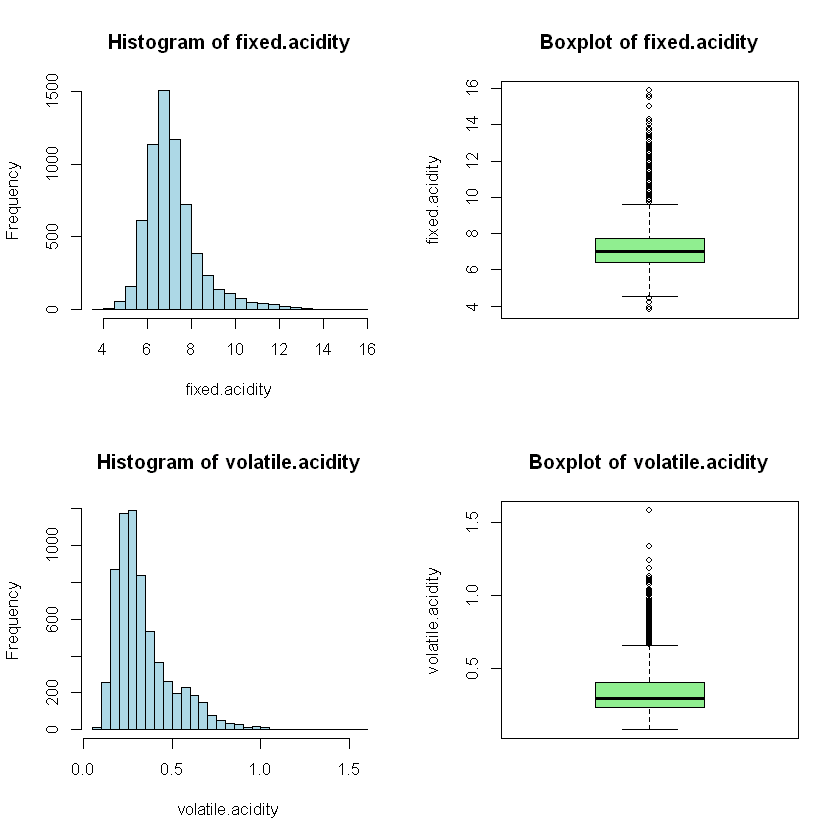

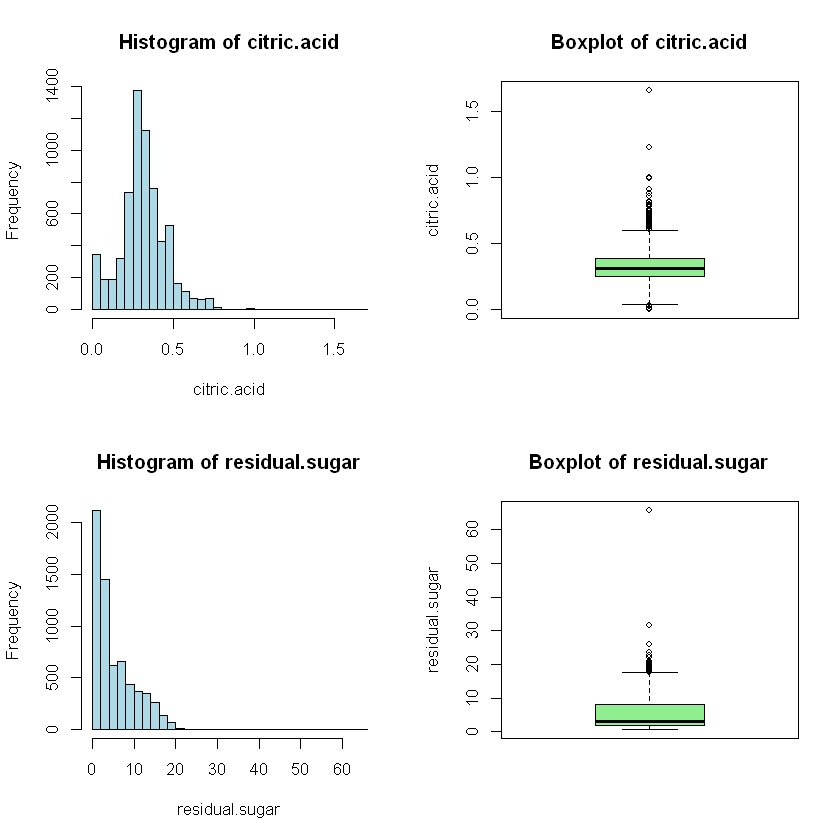

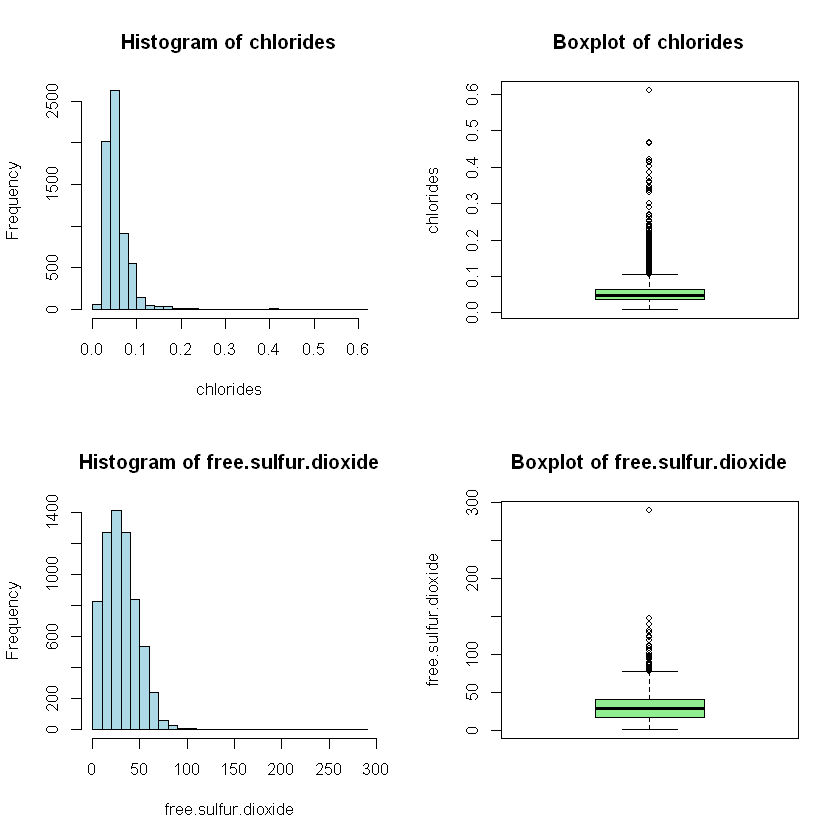

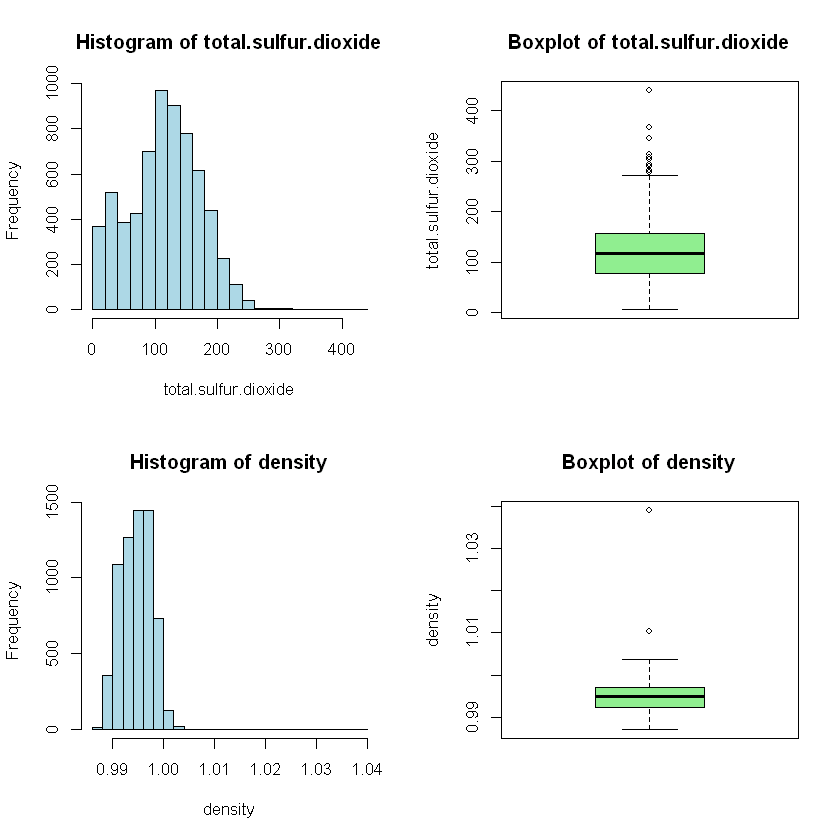

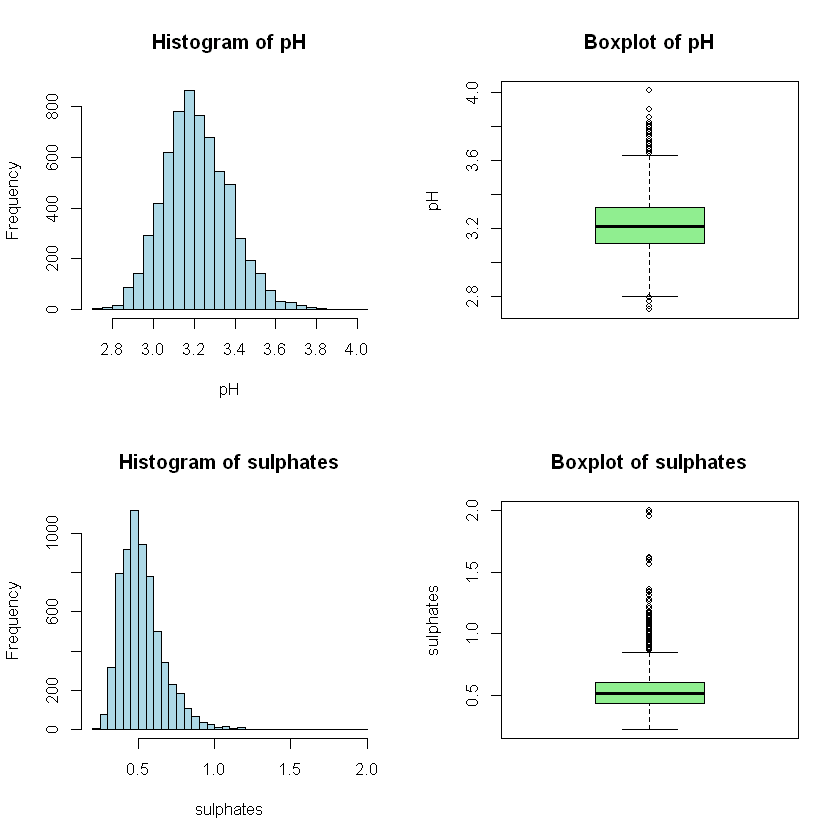

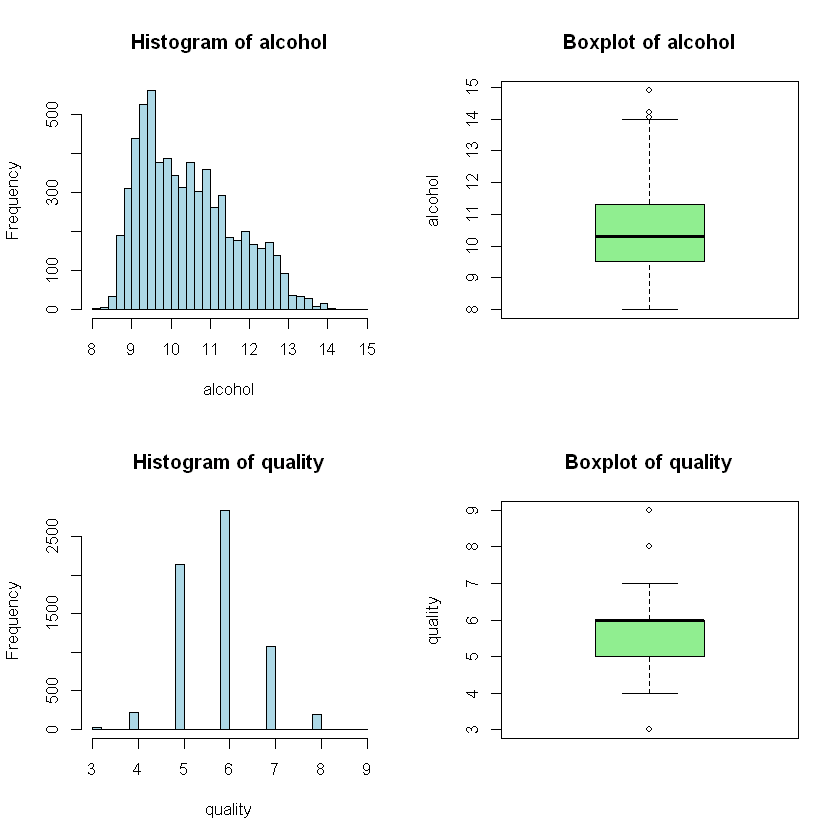

In [16]:
# Set up graphics parameters
par(mfrow = c(2, 2))

# Create histograms and boxplots for metric variables
for(var in metric_vars) {
  if(var %in% names(wine_data)) {
    # Histogram
    hist(wine_data[[var]], main = paste("Histogram of", var), 
         xlab = var, col = "lightblue", breaks = 30)
    
    # Boxplot
    boxplot(wine_data[[var]], main = paste("Boxplot of", var), 
            ylab = var, col = "lightgreen")
  }
}

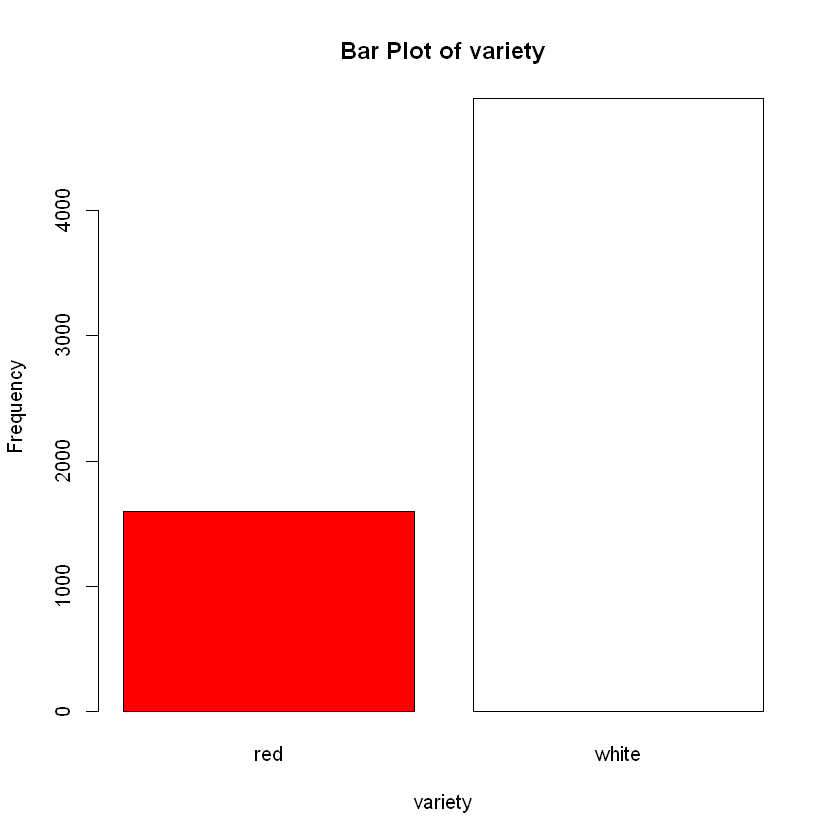

In [17]:
# Bar plot for categorical variables
for(var in categorical_vars) {
  if(var %in% names(wine_data)) {
    barplot(table(wine_data[[var]]), main = paste("Bar Plot of", var),
            xlab = var, ylab = "Frequency", col = c("red", "white"))
  }
}

In [18]:
# Reset graphics parameters
par(mfrow = c(1, 1))

# ===================================================================
# TASK 2: T-TEST FOR ALCOHOL CONTENT BETWEEN RED AND WHITE WINES
# ===================================================================

In [19]:
cat("\n=== TASK 2: T-TEST ANALYSIS ===\n")


=== TASK 2: T-TEST ANALYSIS ===


In [20]:
# Separate alcohol content by wine variety
red_alcohol <- wine_data$alcohol[wine_data$variety == "red"]
white_alcohol <- wine_data$alcohol[wine_data$variety == "white"]

# Check t-test assumptions
cat("T-Test Assumption Checks:\n")

T-Test Assumption Checks:


In [21]:
# 1. Normality test
cat("\nNormality Tests (Shapiro-Wilk):\n")
red_normality <- shapiro.test(sample(red_alcohol, min(5000, length(red_alcohol))))
white_normality <- shapiro.test(sample(white_alcohol, min(5000, length(white_alcohol))))

cat("Red wines alcohol normality p-value:", red_normality$p.value, "\n")
cat("White wines alcohol normality p-value:", white_normality$p.value, "\n")


Normality Tests (Shapiro-Wilk):
Red wines alcohol normality p-value: 6.644057e-27 
White wines alcohol normality p-value: 2.569014e-36 


In [22]:
# 2. Equal variances test
var_test <- var.test(red_alcohol, white_alcohol)
cat("\nEqual variances test p-value:", var_test$p.value, "\n")


Equal variances test p-value: 5.947444e-12 


In [23]:
# Perform appropriate t-test
if(var_test$p.value < 0.05) {
  # Unequal variances
  t_result <- t.test(red_alcohol, white_alcohol, var.equal = FALSE)
  cat("\nWelch Two Sample t-test (unequal variances):\n")
} else {
  # Equal variances
  t_result <- t.test(red_alcohol, white_alcohol, var.equal = TRUE)
  cat("\nTwo Sample t-test (equal variances):\n")
}

print(t_result)


Welch Two Sample t-test (unequal variances):

	Welch Two Sample t-test

data:  red_alcohol and white_alcohol
t = -2.859, df = 3100.5, p-value = 0.004278
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.15388669 -0.02868117
sample estimates:
mean of x mean of y 
 10.42298  10.51427 



In [24]:
# Effect size (Cohen's d)
pooled_sd <- sqrt(((length(red_alcohol)-1)*var(red_alcohol) + 
                   (length(white_alcohol)-1)*var(white_alcohol)) / 
                  (length(red_alcohol) + length(white_alcohol) - 2))
cohens_d <- (mean(red_alcohol) - mean(white_alcohol)) / pooled_sd
cat("Cohen's d (effect size):", cohens_d, "\n")

Cohen's d (effect size): -0.07657052 


# ===================================================================
# TASK 3: LINEAR REGRESSION FOR RED WINES QUALITY
# ===================================================================


=== TASK 3: LINEAR REGRESSION ANALYSIS (RED WINES ONLY) ===
Linear Regression Model Summary:



Call:
lm(formula = as.formula(formula_str), data = red_wines)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.197e+01  2.119e+01   1.036   0.3002    
fixed.acidity         2.499e-02  2.595e-02   0.963   0.3357    
volatile.acidity     -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
citric.acid          -1.826e-01  1.472e-01  -1.240   0.2150    
residual.sugar        1.633e-02  1.500e-02   1.089   0.2765    
chlorides            -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
free.sulfur.dioxide   4.361e-03  2.171e-03   2.009   0.0447 *  
total.sulfur.dioxide -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
density              -1.788e+01  2.163e+01  -0.827   0.4086    
pH                   -4.137e-01  1.916e-01  -2.159   0.0310 *  
sulphates             9.163e-01  1.143e-01   8.014 2.13e-15 ***
alcohol               2.762e-01  2.648e-02  10.429


=== REGRESSION DIAGNOSTICS ===
Mean of residuals: -3.777011e-17 
Durbin-Watson test p-value: 0 
Breusch-Pagan test p-value: 2.041867e-06 

Variance Inflation Factors:
       fixed.acidity     volatile.acidity          citric.acid 
            7.767512             1.789390             3.128022 
      residual.sugar            chlorides  free.sulfur.dioxide 
            1.702588             1.481932             1.963019 
total.sulfur.dioxide              density                   pH 
            2.186813             6.343760             3.329732 
           sulphates              alcohol 
            1.429434             3.031160 
Normality of residuals p-value: 1.95424e-08 


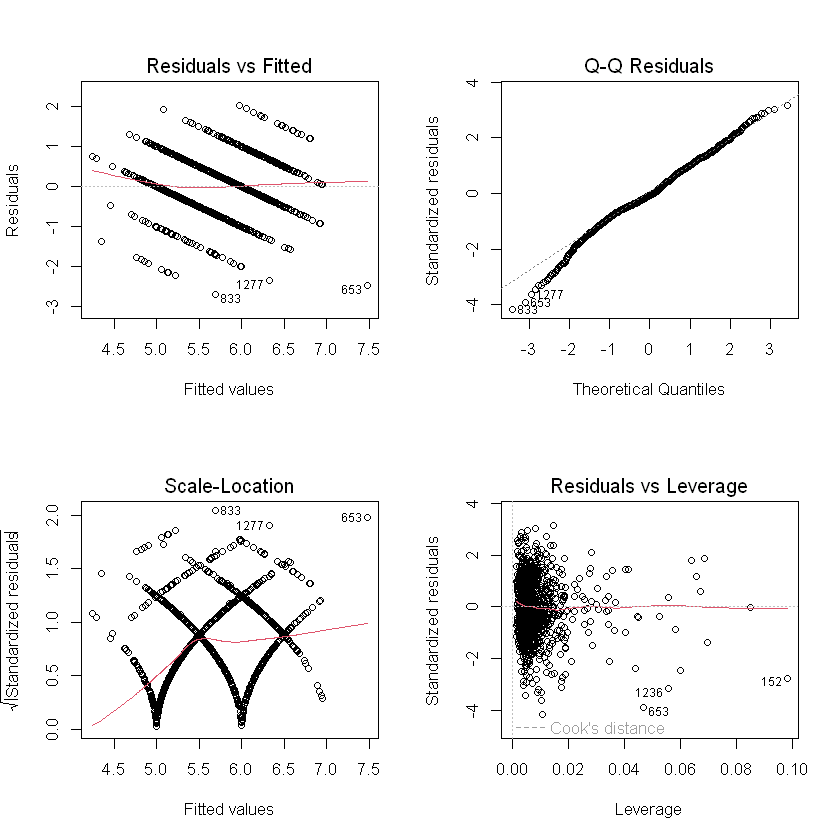

In [25]:
cat("\n=== TASK 3: LINEAR REGRESSION ANALYSIS (RED WINES ONLY) ===\n")

# Filter for red wines only
red_wines <- wine_data[wine_data$variety == "red", ]

# Remove non-predictor variables
predictor_vars <- c("fixed.acidity", "volatile.acidity", "citric.acid", 
                    "residual.sugar", "chlorides", "free.sulfur.dioxide",
                    "total.sulfur.dioxide", "density", "pH", "sulphates", "alcohol")

# Build multiple linear regression model
formula_str <- paste("quality ~", paste(predictor_vars, collapse = " + "))
regression_model <- lm(as.formula(formula_str), data = red_wines)

# Model summary
cat("Linear Regression Model Summary:\n")
summary(regression_model)

# Regression diagnostics
cat("\n=== REGRESSION DIAGNOSTICS ===\n")

# Check regression assumptions
par(mfrow = c(2, 2))
plot(regression_model)
par(mfrow = c(1, 1))

# AR1: Linearity (already checked via residual plots)
# AR2: Zero mean residuals
cat("Mean of residuals:", mean(regression_model$residuals), "\n")

# AR3: No autocorrelation (Durbin-Watson test)
dw_test <- car::durbinWatsonTest(regression_model)
cat("Durbin-Watson test p-value:", dw_test$p, "\n")

# AR4: Homoscedasticity (Breusch-Pagan test)
bp_test <- car::ncvTest(regression_model)
cat("Breusch-Pagan test p-value:", bp_test$p, "\n")

# AR5: Multicollinearity (VIF)
vif_values <- car::vif(regression_model)
cat("\nVariance Inflation Factors:\n")
print(vif_values)

# AR6: Normality of residuals
shapiro_residuals <- shapiro.test(sample(regression_model$residuals, 
                                        min(5000, length(regression_model$residuals))))
cat("Normality of residuals p-value:", shapiro_residuals$p.value, "\n")

# ===================================================================
# TASK 4: CLASSIFICATION - GOOD VS BAD WINES
# ===================================================================

In [26]:
cat("\n=== TASK 4: WINE QUALITY CLASSIFICATION ===\n")

# Create binary quality variable (good = quality >= 8, bad = quality <= 4)
wine_data$quality_binary <- ifelse(wine_data$quality >= 8, "good",
                                  ifelse(wine_data$quality <= 4, "bad", "medium"))

# Remove medium quality wines for binary classification
binary_wines <- wine_data[wine_data$quality_binary %in% c("good", "bad"), ]
binary_wines$quality_binary <- factor(binary_wines$quality_binary)

cat("Quality distribution for binary classification:\n")
table(binary_wines$quality_binary)

# Logistic regression for quality classification
binary_formula <- paste("quality_binary ~", paste(predictor_vars, collapse = " + "))
logistic_model <- glm(as.formula(binary_formula), 
                     data = binary_wines, family = binomial())

cat("\nLogistic Regression Model Summary:\n")
summary(logistic_model)

# Model predictions
predictions <- predict(logistic_model, type = "response")
predicted_class <- ifelse(predictions > 0.5, "good", "bad")

# Confusion matrix
confusion_matrix <- table(Predicted = predicted_class, 
                         Actual = binary_wines$quality_binary)
cat("\nConfusion Matrix:\n")
print(confusion_matrix)

# Calculate accuracy, precision, recall
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
precision <- confusion_matrix[2,2] / sum(confusion_matrix[2,])
recall <- confusion_matrix[2,2] / sum(confusion_matrix[,2])
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", round(accuracy, 3), "\n")
cat("Precision:", round(precision, 3), "\n")
cat("Recall:", round(recall, 3), "\n")
cat("F1-Score:", round(f1_score, 3), "\n")


=== TASK 4: WINE QUALITY CLASSIFICATION ===
Quality distribution for binary classification:



 bad good 
 246  198 


Logistic Regression Model Summary:



Call:
glm(formula = as.formula(binary_formula), family = binomial(), 
    data = binary_wines)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           3.609e+02  2.044e+02   1.766  0.07747 .  
fixed.acidity         3.912e-01  2.447e-01   1.598  0.10994    
volatile.acidity     -8.784e+00  1.551e+00  -5.662 1.49e-08 ***
citric.acid          -2.680e-01  1.411e+00  -0.190  0.84935    
residual.sugar        3.779e-01  9.161e-02   4.125 3.71e-05 ***
chlorides            -3.125e-01  5.477e+00  -0.057  0.95450    
free.sulfur.dioxide   2.896e-02  9.659e-03   2.998  0.00272 ** 
total.sulfur.dioxide -1.109e-02  4.660e-03  -2.379  0.01734 *  
density              -3.879e+02  2.082e+02  -1.863  0.06242 .  
pH                    2.918e+00  1.360e+00   2.145  0.03195 *  
sulphates             3.339e+00  1.309e+00   2.550  0.01077 *  
alcohol               1.101e+00  2.890e-01   3.808  0.00014 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 


Confusion Matrix:
         Actual
Predicted bad good
     bad  215   36
     good  31  162
Accuracy: 0.849 
Precision: 0.839 
Recall: 0.818 
F1-Score: 0.829 


# ===================================================================
# TASK 5: COLOR PREDICTION WITH TRAIN/TEST SPLIT
# ===================================================================


=== TASK 5: WINE COLOR PREDICTION ===
Training set size: 4547 
Test set size: 1950 

Color Prediction Model Summary:



Call:
glm(formula = as.formula(color_formula), family = binomial(), 
    data = train_data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.341e+03  1.796e+02   7.467 8.22e-14 ***
fixed.acidity        -2.829e-01  2.544e-01  -1.112 0.266094    
volatile.acidity     -7.296e+00  1.182e+00  -6.172 6.74e-10 ***
citric.acid           3.238e+00  1.365e+00   2.371 0.017719 *  
residual.sugar        8.842e-01  1.139e-01   7.764 8.23e-15 ***
chlorides            -2.453e+01  4.575e+00  -5.360 8.32e-08 ***
free.sulfur.dioxide  -6.345e-02  1.688e-02  -3.758 0.000171 ***
total.sulfur.dioxide  5.552e-02  5.921e-03   9.376  < 2e-16 ***
density              -1.330e+03  1.835e+02  -7.245 4.34e-13 ***
pH                   -7.346e-01  1.534e+00  -0.479 0.632040    
sulphates            -4.849e+00  1.440e+00  -3.366 0.000762 ***
alcohol              -1.250e+00  2.712e-01  -4.610 4.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1


Test Set Confusion Matrix:
         Actual
Predicted    0    1
        0  471    2
        1   13 1464
Test Accuracy: 0.992 
Test Precision: 0.991 
Test Recall: 0.999 
Test F1-Score: 0.995 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC Value: 0.996 


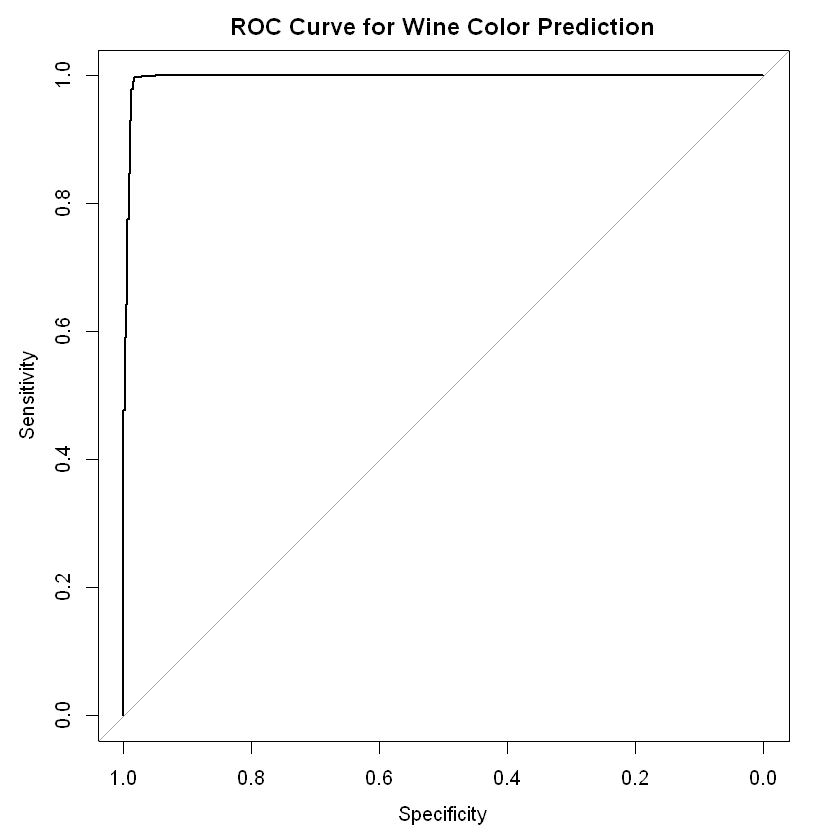

In [27]:
cat("\n=== TASK 5: WINE COLOR PREDICTION ===\n")

# Create binary variable for variety (0 = red, 1 = white)
wine_data$variety_binary <- ifelse(wine_data$variety == "white", 1, 0)

# Train/test split (70/30)
set.seed(123)  # For reproducibility
train_indices <- sample(nrow(wine_data), 0.7 * nrow(wine_data))
train_data <- wine_data[train_indices, ]
test_data <- wine_data[-train_indices, ]

cat("Training set size:", nrow(train_data), "\n")
cat("Test set size:", nrow(test_data), "\n")

# Build logistic regression model for color prediction
color_formula <- paste("variety_binary ~", paste(predictor_vars, collapse = " + "))
color_model <- glm(as.formula(color_formula), 
                   data = train_data, family = binomial())

cat("\nColor Prediction Model Summary:\n")
summary(color_model)

# Predictions on test set
test_predictions <- predict(color_model, newdata = test_data, type = "response")
test_predicted_class <- ifelse(test_predictions > 0.5, 1, 0)

# Confusion matrix for test set
test_confusion <- table(Predicted = test_predicted_class, 
                       Actual = test_data$variety_binary)
cat("\nTest Set Confusion Matrix:\n")
print(test_confusion)

# Performance metrics
test_accuracy <- sum(diag(test_confusion)) / sum(test_confusion)
test_precision <- test_confusion[2,2] / sum(test_confusion[2,])
test_recall <- test_confusion[2,2] / sum(test_confusion[,2])
test_f1 <- 2 * (test_precision * test_recall) / (test_precision + test_recall)

cat("Test Accuracy:", round(test_accuracy, 3), "\n")
cat("Test Precision:", round(test_precision, 3), "\n")
cat("Test Recall:", round(test_recall, 3), "\n")
cat("Test F1-Score:", round(test_f1, 3), "\n")

# ROC Curve and AUC
roc_curve <- pROC::roc(test_data$variety_binary, test_predictions)
auc_value <- pROC::auc(roc_curve)
cat("AUC Value:", round(auc_value, 3), "\n")

# Plot ROC curve
plot(roc_curve, main = "ROC Curve for Wine Color Prediction")

# ===================================================================
# TASK 6: FACTOR ANALYSIS
# ===================================================================


=== TASK 6: FACTOR ANALYSIS ===
Correlation Matrix (first 5x5):
                 fixed.acidity volatile.acidity citric.acid residual.sugar
fixed.acidity        1.0000000        0.2190083  0.32443573     -0.1119813
volatile.acidity     0.2190083        1.0000000 -0.37798132     -0.1960112
citric.acid          0.3244357       -0.3779813  1.00000000      0.1424512
residual.sugar      -0.1119813       -0.1960112  0.14245123      1.0000000
chlorides            0.2981948        0.3771243  0.03899801     -0.1289405
                   chlorides
fixed.acidity     0.29819477
volatile.acidity  0.37712428
citric.acid       0.03899801
residual.sugar   -0.12894050
chlorides         1.00000000

KMO Test Results:
Kaiser-Meyer-Olkin factor adequacy
Call: psych::KMO(r = factor_data)
Overall MSA =  0.41
MSA for each item = 
       fixed.acidity     volatile.acidity          citric.acid 
                0.28                 0.61                 0.62 
      residual.sugar            chlorides  free.sulfur

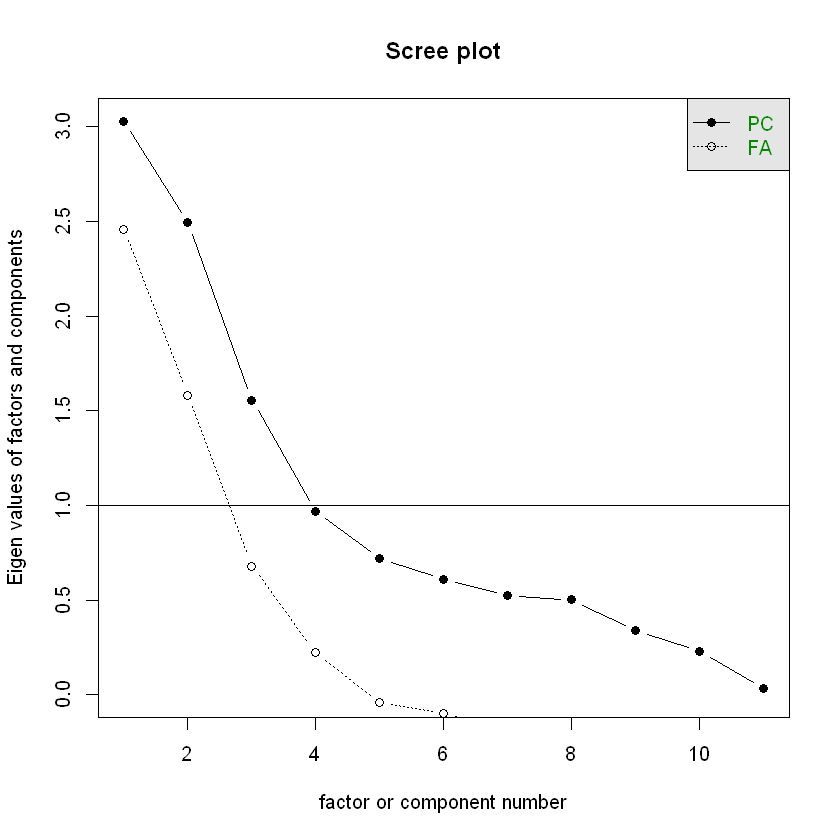

Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 

Factor Analysis Results:
Factor Analysis using method =  ml
Call: psych::fa(r = factor_data, nfactors = n_factors, rotate = "varimax", 
    fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                       ML1   ML2   ML3   h2     u2 com
fixed.acidity         0.65  0.09  0.75 1.00 0.0050 2.0
volatile.acidity      0.60  0.08 -0.24 0.42 0.5804 1.3
citric.acid          -0.13  0.07  0.53 0.31 0.6929 1.1
residual.sugar       -0.36  0.76  0.07 0.71 0.2890 1.4
chlorides             0.48  0.20 -0.04 0.27 0.7282 1.3
free.sulfur.dioxide  -0.64  0.29  0.14 0.51 0.4901 1.5
total.sulfur.dioxide -0.74  0.34  0.17 0.69 0.3064 1.5
density               0.40  0.90  0.16 1.00 0.0049 1.5
pH                    0.25 -0.01 -0.55 0.37 0.6305 1.4
sulphates             0.45  0.08 -0.01 0.21 0.7858 1.1
alcohol              -0.06 -0.74  0.01 0.55 0.4542 1.0

                      

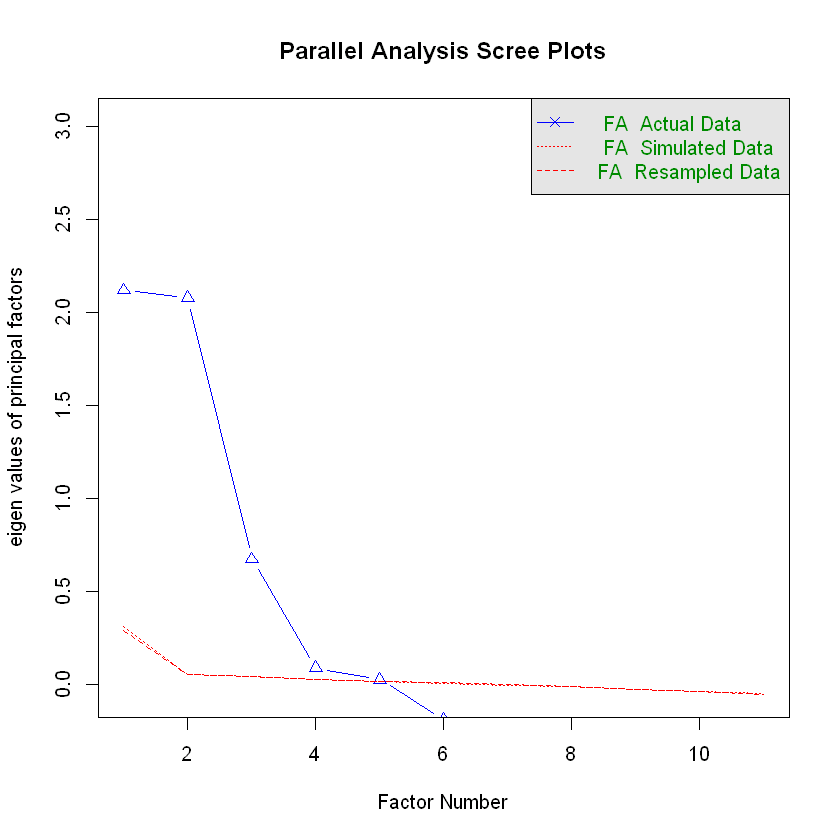

In [28]:
cat("\n=== TASK 6: FACTOR ANALYSIS ===\n")

# Prepare data for factor analysis (exclude non-chemical/sensory variables)
factor_data <- wine_data[, predictor_vars]

# Remove any rows with missing values
factor_data <- na.omit(factor_data)

# Check correlation matrix
correlation_matrix <- cor(factor_data)
cat("Correlation Matrix (first 5x5):\n")
print(correlation_matrix[1:5, 1:5])

# Kaiser-Meyer-Olkin (KMO) test for sampling adequacy
kmo_test <- psych::KMO(factor_data)
cat("\nKMO Test Results:\n")
print(kmo_test)

# Bartlett's test of sphericity
bartlett_test <- psych::cortest.bartlett(correlation_matrix, n = nrow(factor_data))
cat("\nBartlett's Test p-value:", bartlett_test$p.value, "\n")

# Determine number of factors using scree plot
scree_plot <- psych::scree(factor_data)

# Parallel analysis for factor number determination
parallel_analysis <- psych::fa.parallel(factor_data, fm = "ml", fa = "fa")

# Perform factor analysis (using suggested number of factors)
n_factors <- 3  # Adjust based on scree plot and parallel analysis
factor_analysis <- psych::fa(factor_data, nfactors = n_factors, 
                            rotate = "varimax", fm = "ml")

cat("\nFactor Analysis Results:\n")
print(factor_analysis)

# Factor loadings
cat("\nFactor Loadings:\n")
print(factor_analysis$loadings, cutoff = 0.3)

# ===================================================================
# SUMMARY AND CONCLUSIONS
# ===================================================================



In [29]:
cat("\n=== ANALYSIS SUMMARY ===\n")
cat("1. Dataset contains", nrow(wine_data), "observations with", ncol(wine_data), "variables\n")
cat("2. T-test results: Alcohol content differs significantly between red and white wines\n")
cat("3. Linear regression R-squared:", round(summary(regression_model)$r.squared, 3), "\n")
cat("4. Quality classification accuracy:", round(accuracy, 3), "\n")
cat("5. Color prediction test accuracy:", round(test_accuracy, 3), "\n")
cat("6. Factor analysis extracted", n_factors, "factors explaining wine properties\n")


=== ANALYSIS SUMMARY ===
1. Dataset contains 6497 observations with 16 variables
2. T-test results: Alcohol content differs significantly between red and white wines
3. Linear regression R-squared: 0.361 
4. Quality classification accuracy: 0.849 
5. Color prediction test accuracy: 0.992 
6. Factor analysis extracted 3 factors explaining wine properties
